In [1]:
library("metacell")
library("Matrix")
library("ggplot2")
library("ggrepel")
library("tgstat")
library("zoo")
library("qvalue")
library("devtools")
library("data.table")
library("tidyverse")
library("tglkmeans")
library('RColorBrewer')


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Loading required package: usethis

-- Attaching packages --------------------------------------- tidyverse 1.3.1 --

v tibble  3.1.3     v dplyr   1.0.9
v tidyr   1.2.0     v stringr 1.4.0
v readr   2.1.0     v forcats 0.5.1
v purrr   0.3.4     

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::between()   masks data.table::between()
x tidyr::expand()    masks Matrix::expand()
x dplyr::filter()    masks stats::filter()
x dplyr::first()     masks data.table::first()
x dplyr::lag()       masks stats::lag()
x dplyr::last()      masks data.table::last()
x tidyr::pack()      masks Matrix::pack()
x purrr::transpose() masks data.table::transpose()
x tidyr::unpack()    masks Matrix::unpack()



In [2]:
scdb_init("../scrna_db/", force_reinit=T)

fig_dir <- "../figs/"
if(!dir.exists(fig_dir)) dir.create(fig_dir)
scfigs_init(fig_dir)

initializing scdb to ../scrna_db/



In [3]:
mat_exe <- scdb_mat("exe")
mc_exe <- scdb_mc("exe")
md_exe <- mat_exe@cell_metadata[names(mc_exe@mc),]

mat_emb <- scdb_mat("emb")
mc_emb <- scdb_mc("emb")
md_emb <- mat_emb@cell_metadata[names(mc_emb@mc),]

mat_embexe <- scdb_mat("embexe")
mc_embexe <- scdb_mc("embexe_recolored")
md_embexe <- mat_embexe@cell_metadata[names(mc_embexe@mc),]

In [4]:
color_key <- mc_embexe@color_key

col_to_ct = color_key$group
names(col_to_ct) = color_key$color

ct_to_col = color_key$color
names(ct_to_col) = color_key$group

mcs_ordered <- mc_emb@colors
names(mcs_ordered) <- 1:length(mcs_ordered)

mcs_ordered <- mcs_ordered[order(factor(mcs_ordered, levels = c(color_key$color[1:41])))]

col_to_ct =  mc_exe@color_key$group
names(col_to_ct) = mc_exe@color_key$color
ct_to_col = mc_exe@color_key$color
names(ct_to_col) = mc_exe@color_key$group
col_to_rank = c(1:nrow(mc_exe@color_key))
names(col_to_rank) = mc_exe@color_key$color

annotation_col = data.frame(ct = col_to_ct[mc_exe@colors],stringsAsFactors = F)
rownames(annotation_col) = c(1:nrow(annotation_col))
annotation_colors = list(ct = ct_to_col)

shades_rdbu <- rev(colorRampPalette(RColorBrewer::brewer.pal(11,name = "RdBu"))(100))
shades_blues <- colorRampPalette(RColorBrewer::brewer.pal(9,"Blues"))(100)
shades_reds <- colorRampPalette(RColorBrewer::brewer.pal(9,"Reds"))(100)
shades_yellows <- colorRampPalette(RColorBrewer::brewer.pal(9,"YlOrBr"))(100)
shades_greys <- colorRampPalette(RColorBrewer::brewer.pal(9,"Greys"))(100)
shades_greens <- colorRampPalette(RColorBrewer::brewer.pal(9,"Greens"))(100)
shades_purples <- colorRampPalette(RColorBrewer::brewer.pal(9,"BuPu"))(100)

chorion_cls = names(mc_exe@mc)[mc_exe@colors[mc_exe@mc] == mc_exe@color_key$color[1]]
tsc_cls = names(mc_exe@mc)[mc_exe@colors[mc_exe@mc] == mc_exe@color_key$color[2]]
tsc2_cls = names(mc_exe@mc)[mc_exe@colors[mc_exe@mc] == mc_exe@color_key$color[3]]
spt_cls = names(mc_exe@mc)[mc_exe@colors[mc_exe@mc] == mc_exe@color_key$color[4]]
epc_cls = names(mc_exe@mc)[mc_exe@colors[mc_exe@mc] == mc_exe@color_key$color[5]]
tgc_cls = names(mc_exe@mc)[mc_exe@colors[mc_exe@mc] == mc_exe@color_key$color[6]]
ptsc_cls = names(mc_exe@mc)[mc_exe@colors[mc_exe@mc] == mc_exe@color_key$color[7]]
spa_cls = names(mc_exe@mc)[mc_exe@colors[mc_exe@mc] == mc_exe@color_key$color[8]]

chorion_mcs = which(mc_exe@colors == mc_exe@color_key$color[1])
tsc_mcs = which(mc_exe@colors == mc_exe@color_key$color[2])
tsc2_mcs = which(mc_exe@colors == mc_exe@color_key$color[3])
spt_mcs = which(mc_exe@colors == mc_exe@color_key$color[4])
epc_mcs = which(mc_exe@colors == mc_exe@color_key$color[5])
tgc_mcs = which(mc_exe@colors == mc_exe@color_key$color[6])
ptsc_mcs = which(mc_exe@colors == mc_exe@color_key$color[7])
spa_mcs = which(mc_exe@colors == mc_exe@color_key$color[8])

mc_time <- tapply(md_exe$developmental_time, mc_exe@mc[rownames(md_exe)], mean)
mc_new_ord = as.numeric(names(mc_time[order(as.numeric(mc_time))]))

chorion_mcs_ord = mc_new_ord[which(mc_new_ord %in% chorion_mcs)]
tsc_mcs_ord = mc_new_ord[which(mc_new_ord %in% tsc_mcs)]
tsc2_mcs_ord = mc_new_ord[which(mc_new_ord %in% tsc2_mcs)]
spt_mcs_ord = mc_new_ord[which(mc_new_ord %in% spt_mcs)]
epc_mcs_ord = mc_new_ord[which(mc_new_ord %in% epc_mcs)]
tgc_mcs_ord = mc_new_ord[which(mc_new_ord %in% tgc_mcs)]
ptsc_mcs_ord = mc_new_ord[which(mc_new_ord %in% ptsc_mcs)]
spa_mcs_ord = mc_new_ord[which(mc_new_ord %in% spa_mcs)]

mcs_all <- c(tsc_mcs_ord,chorion_mcs_ord,tsc2_mcs_ord,spt_mcs_ord,epc_mcs_ord,tgc_mcs_ord,spa_mcs_ord,ptsc_mcs_ord)
mcs_epc_lineage <- c(tgc_mcs_ord,epc_mcs_ord,spt_mcs_ord)
mcs_chorion_lineage <- c(tsc_mcs_ord,chorion_mcs_ord,tsc2_mcs_ord)

library(dplyr)

exe_cells = rownames(md_exe)[md_exe$Experiment != "Wildtype project"]
exe_cells_f = exe_cells[!is.na(md_exe[exe_cells,"time_bin"])]

emb_age_df = unique(md_exe[exe_cells_f,c("embryo","transcriptional_rank",
                                                    "time_bin","developmental_time")])
emb_age_df = emb_age_df[order(emb_age_df$transcriptional_rank),]
sc_time_annot = data.frame(cell = exe_cells_f,
                           embryo = md_exe[exe_cells_f,"embryo"])
sc_time_annot = left_join(sc_time_annot,emb_age_df,by = "embryo")
f = !is.na(sc_time_annot$developmental_time)
sc_time = sc_time_annot$developmental_time[f]
names(sc_time) = sc_time_annot$cell[f]

emb_ranks <- read.csv(file = "../data/embexe_age_morph_rank.csv")
emb_ranks <- emb_ranks[!is.na(emb_ranks$transcriptional_rank),]
emb_ranks <- emb_ranks[order(emb_ranks$transcriptional_rank,decreasing = F),]
age_group_cols = c(RColorBrewer::brewer.pal(9,"OrRd")[2:8],RColorBrewer::brewer.pal(9,"PuBu")[2:8],RColorBrewer::brewer.pal(9,"YlGn")[3:5])
emb_ranks$color = age_group_cols[emb_ranks$age_group]
emb_ranks$morph.rank <- NA

emb_cols <- mc_embexe@color_key$color[1:42]
exe_cols <- mc_embexe@color_key$color[43:50]
exe_cls <- names(mc_embexe@mc)[mc_embexe@colors[mc_embexe@mc] %in% exe_cols]
emb_cls <- names(mc_embexe@mc)[mc_embexe@colors[mc_embexe@mc] %in% emb_cols] 

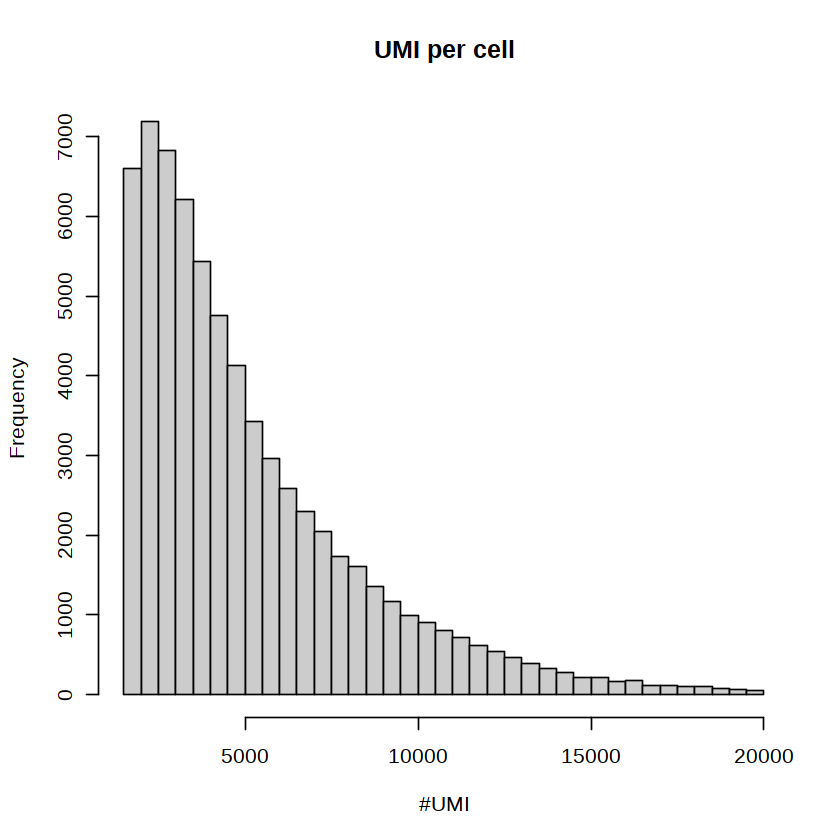

In [5]:
### EDF1b ###
n_umi = colSums(mat_embexe@mat[,rownames(md_embexe)])
hist(n_umi,40,main = "UMI per cell",col = "grey80",xlab = "#UMI")

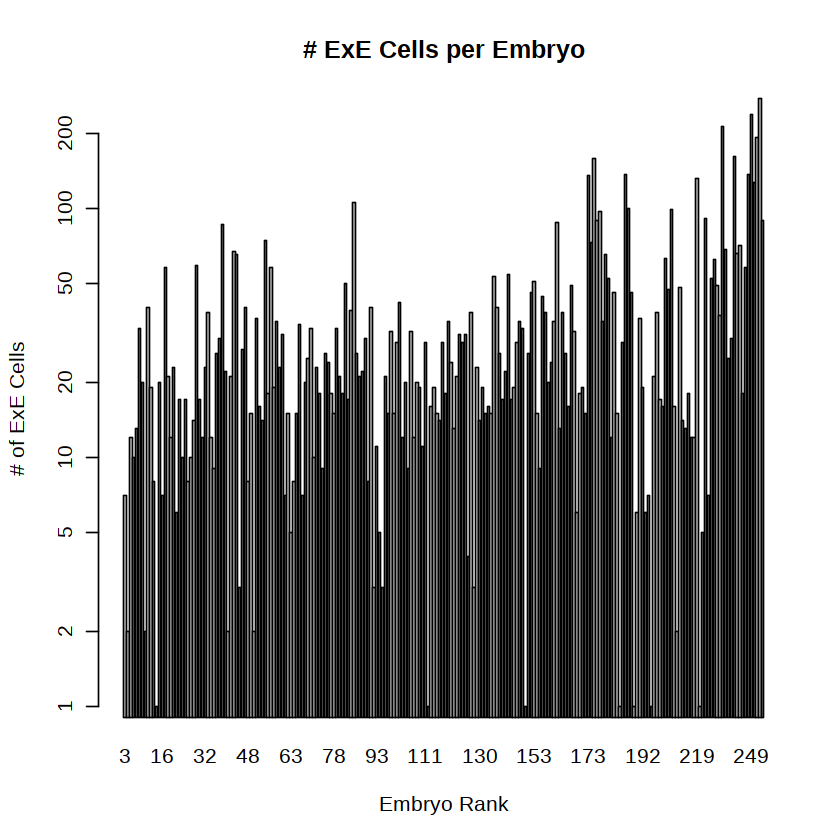

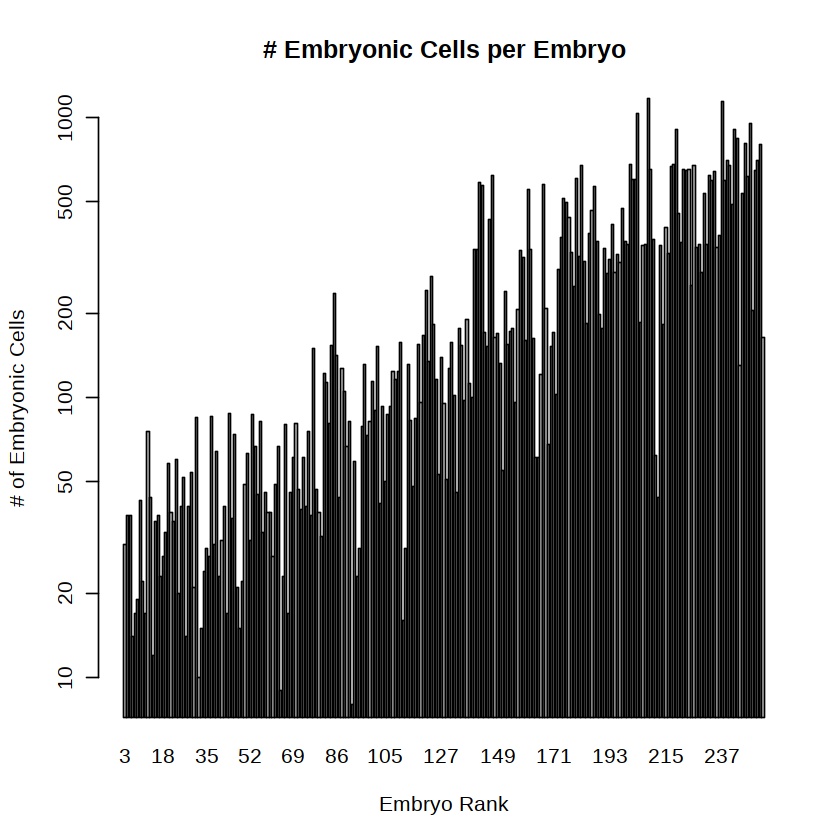

In [6]:
### EDF1c ###
n_exe_per_emb = table(md_embexe[exe_cls,"transcriptional_rank"])
barplot(n_exe_per_emb,log = "y",col = "grey80", main = "# ExE Cells per Embryo", xlab = "Embryo Rank", ylab = "# of ExE Cells")

n_emb_per_emb = table(md_embexe[emb_cls,"transcriptional_rank"])
barplot(n_emb_per_emb,log = "y",col = "grey80", main = "# Embryonic Cells per Embryo", xlab = "Embryo Rank", ylab = "# of Embryonic Cells")

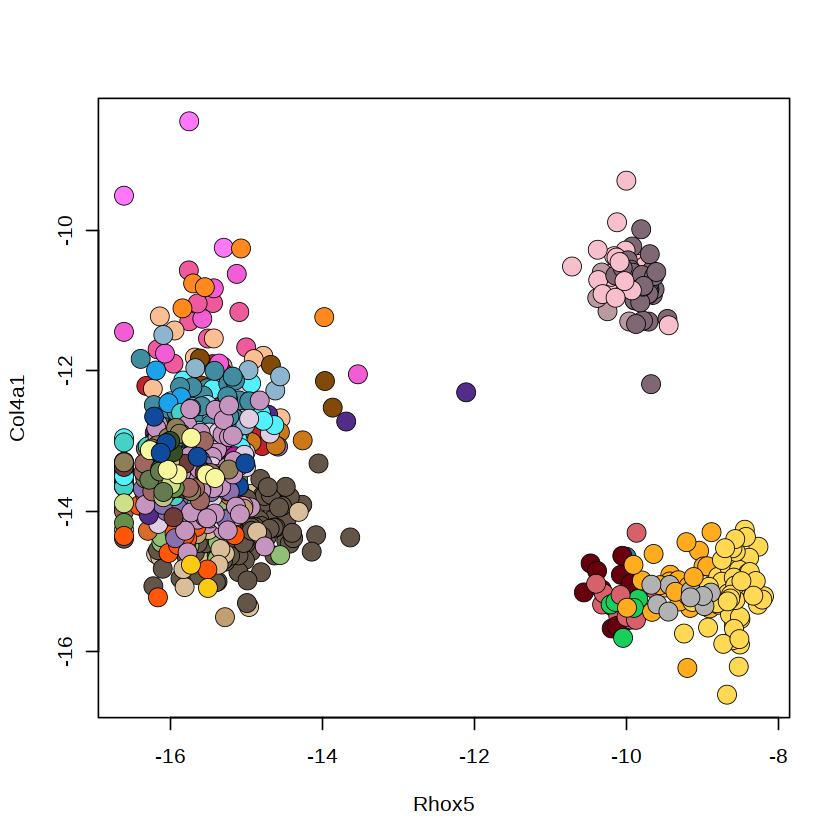

In [7]:
### EDF1d ###
mcell_mc_plot_gg(mc_id = "embexe_recolored", 
                 g1 = "Rhox5", g2 = "Col4a1", 
                 text_cex = 0, 
                 use_egc = T, 
                 mc_filt = c(mc_embexe@colors %in% c(mc_embexe@color_key$color[1:41],exe_cols)))

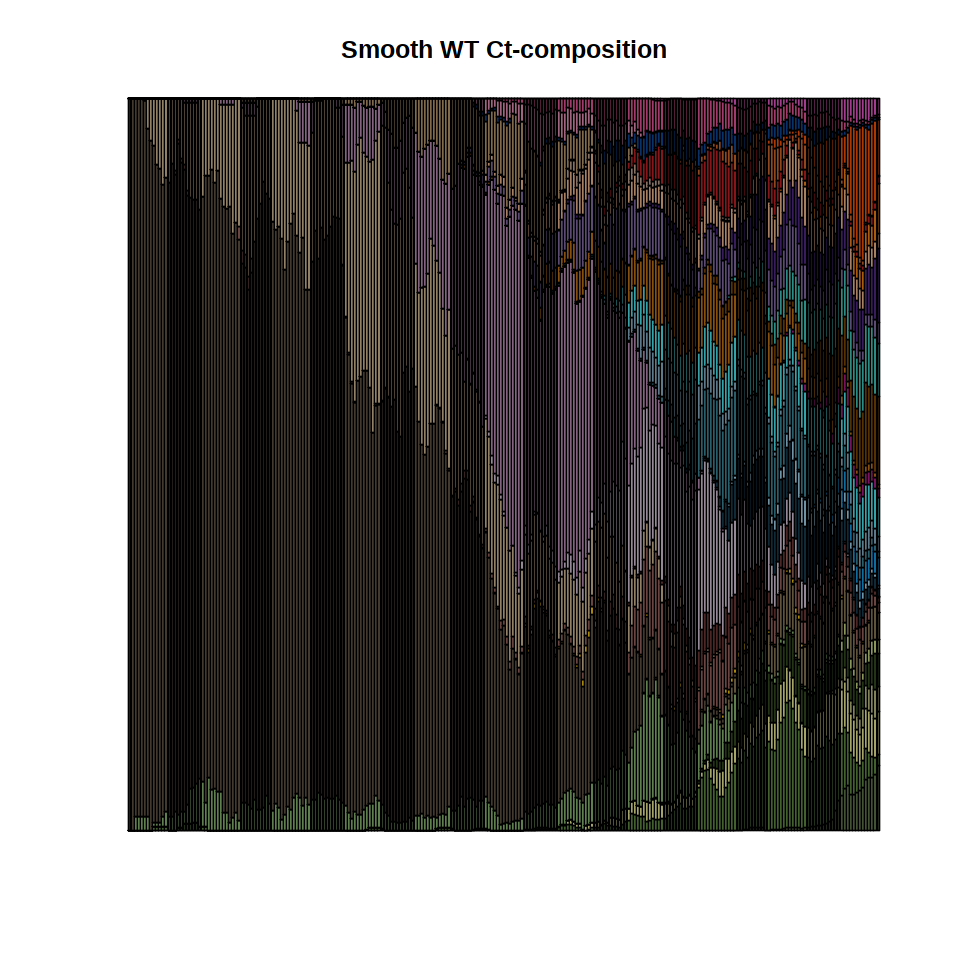

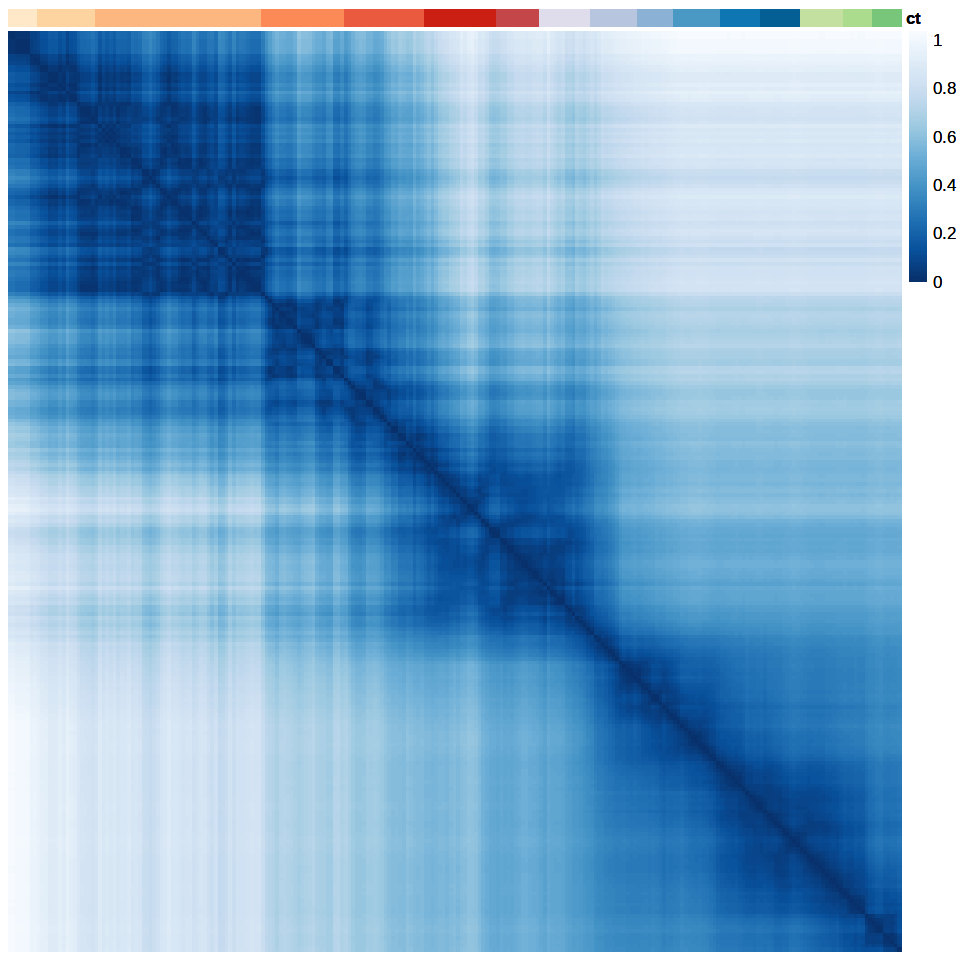

In [8]:
### EDF1e ###
options(repr.plot.width=8, repr.plot.height=8)

embryo_to_col_wt <- table(factor(x = mc_embexe@colors[mc_embexe@mc],levels = color_key$color),
                          mat_embexe@cell_metadata[names(mc_embexe@mc),"embryo"])

embs_with_age <- unique(mat_embexe@cell_metadata[mat_embexe@cell_metadata$embryo %in% colnames(embryo_to_col_wt),
                                                 c("developmental_time",'embryo', 'age_group')])

embs_with_age <- embs_with_age[!is.na(embs_with_age$developmental_time),]
embs_with_age <- embs_with_age[order(embs_with_age$developmental_time, decreasing = F),]
wt_emb_ord <- embs_with_age$embryo
age_group_cols = c(RColorBrewer::brewer.pal(9,"OrRd")[2:8],RColorBrewer::brewer.pal(9,"PuBu")[2:8],RColorBrewer::brewer.pal(9,"YlGn")[3:5])
embs_with_age$color = age_group_cols[embs_with_age$age_group]
names(age_group_cols) <- c(1:17)

annotation_col = data.frame(ct = embs_with_age$age_group)
rownames(annotation_col) = embs_with_age$embryo
annotation_colors = list(ct = age_group_cols)

emb_cols = color_key$color[c(1:38)]

embryo_to_col_wt_emb <- embryo_to_col_wt[emb_cols,wt_emb_ord]
embryo_to_col_wt_emb_n <- t(t(embryo_to_col_wt_emb)/colSums(embryo_to_col_wt_emb))

embryo_to_col_wt_emb_n_smoothed = t(apply(embryo_to_col_wt_emb_n,1,function(v) {return(zoo::rollmean(v, k = 5))}))

barplot(embryo_to_col_wt_emb_n_smoothed,col = rownames(embryo_to_col_wt_emb_n_smoothed), main = "Smooth WT Ct-composition" ,yaxt="n", xaxt="n")

dist_mat <- as.matrix(dist(t(embryo_to_col_wt_emb_n_smoothed)))

p <- pheatmap::pheatmap(dist_mat,
                        annotation_legend = F,
                        legend = T,
                        cluster_rows = F, 
                        cluster_cols = F,
                        annotation_col = annotation_col, 
                        annotation_colors = annotation_colors,
                        color = rev(shades_blues),
                        treeheight_row = 0, 
                        treeheight_col = 0,
                        border_color = NA, 
                        show_rownames = F, 
                        show_colnames = F)

print(p)

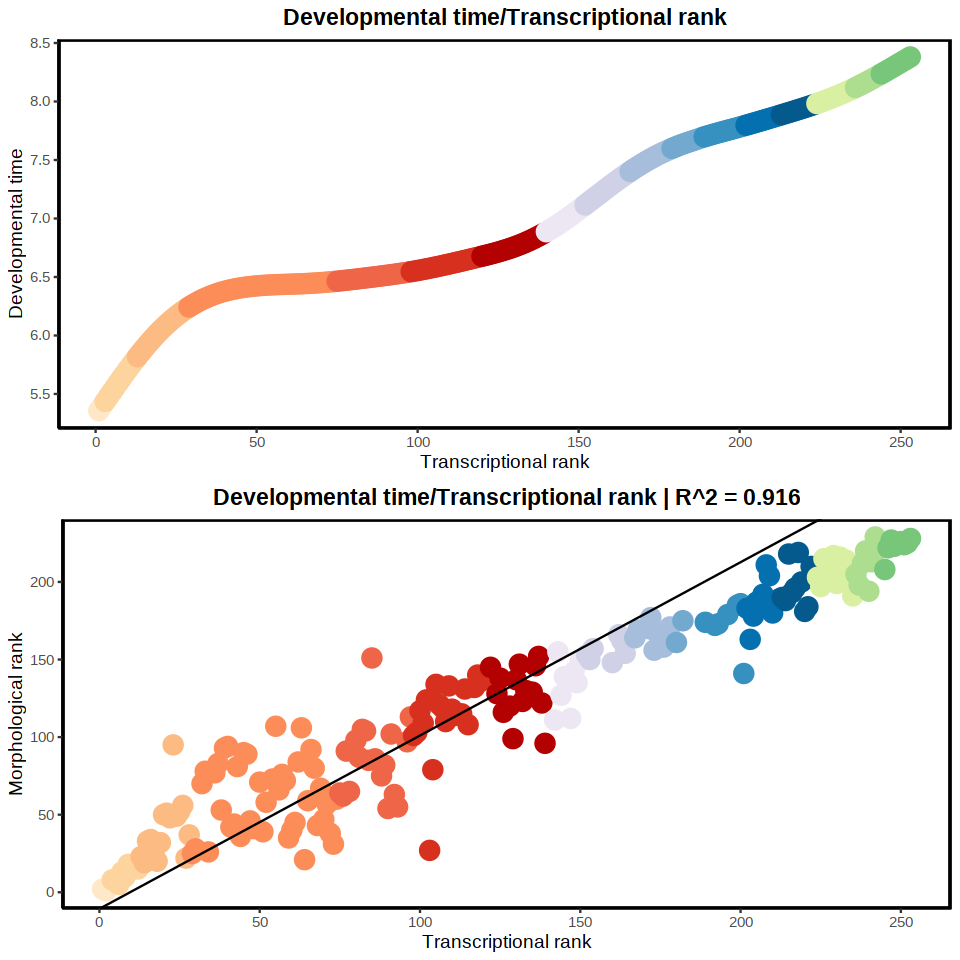

In [9]:
### EDF1f ###
xlabel = "Transcriptional rank"
ylabel = "Developmental time"
main_label = ""
cex.lab = 2
cex.axis = 2
cex.main = 2
cex = 2

p1 <- ggplot(data = emb_ranks, aes(x = transcriptional_rank, y = developmental_time, col = color)) +
    geom_point(size = 5) +
    scale_color_identity() +
    ylab(ylabel) + 
    ggtitle(label = "Developmental time/Transcriptional rank") +
    xlab(xlabel) +
    scale_y_continuous(breaks = seq(from = 5,to = 8.5,length.out = 8)) +
    theme(plot.title = element_text(face = "bold",hjust = 0.5),
        plot.subtitle = element_text(hjust = 0.5),
        panel.border = element_rect(fill=NA, size = 1))

emb_ranks <- emb_ranks[!is.na(emb_ranks$morphological_rank),]
formula <- emb_ranks$transcriptional_rank~emb_ranks$morphological_rank
lm <- lm(formula)
r2 <- round(summary(lm)$adj.r.squared,3)

p2 <- ggplot(data = emb_ranks, aes(x = transcriptional_rank, y = morphological_rank, col = color)) +
    geom_point(size = 5) +
    scale_color_identity() +
    ylab("Morphological rank") + 
    ggtitle(label = sprintf("Developmental time/Transcriptional rank | R^2 = %s",r2)) +
    xlab(xlabel) +
    geom_abline(slope = coef(lm)[["emb_ranks$morphological_rank"]], 
              intercept = coef(lm)[["(Intercept)"]]) +
    theme(plot.title = element_text(face = "bold",hjust = 0.5),
        plot.subtitle = element_text(hjust = 0.5),
        panel.border = element_rect(fill=NA, size = 1))

gridExtra::grid.arrange(p1,p2, nrow = 2)